# Chapter 2: Frequentist Inference

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import norm

In [2]:
plt.rcParams.update({'font.size': 20})
plt.rcParams["figure.figsize"] = (20, 15)

### Intro

In [3]:
url = "https://web.stanford.edu/~hastie/CASI_files/DATA/gfr.txt"

In [4]:
vec = pd.read_csv(url, header=None)[0].values

In [5]:
n = len(vec)
mean_ = round(np.sum(vec) / n, 2)
stderror_ = round(np.power(np.sum(np.power(vec - mean_, 2)) / (n * (n - 1)), 0.5), 2)
print('{m} (mean) +/- {se} (se)'.format(m=mean_, se=stderror_))

54.27 (mean) +/- 0.94 (se)


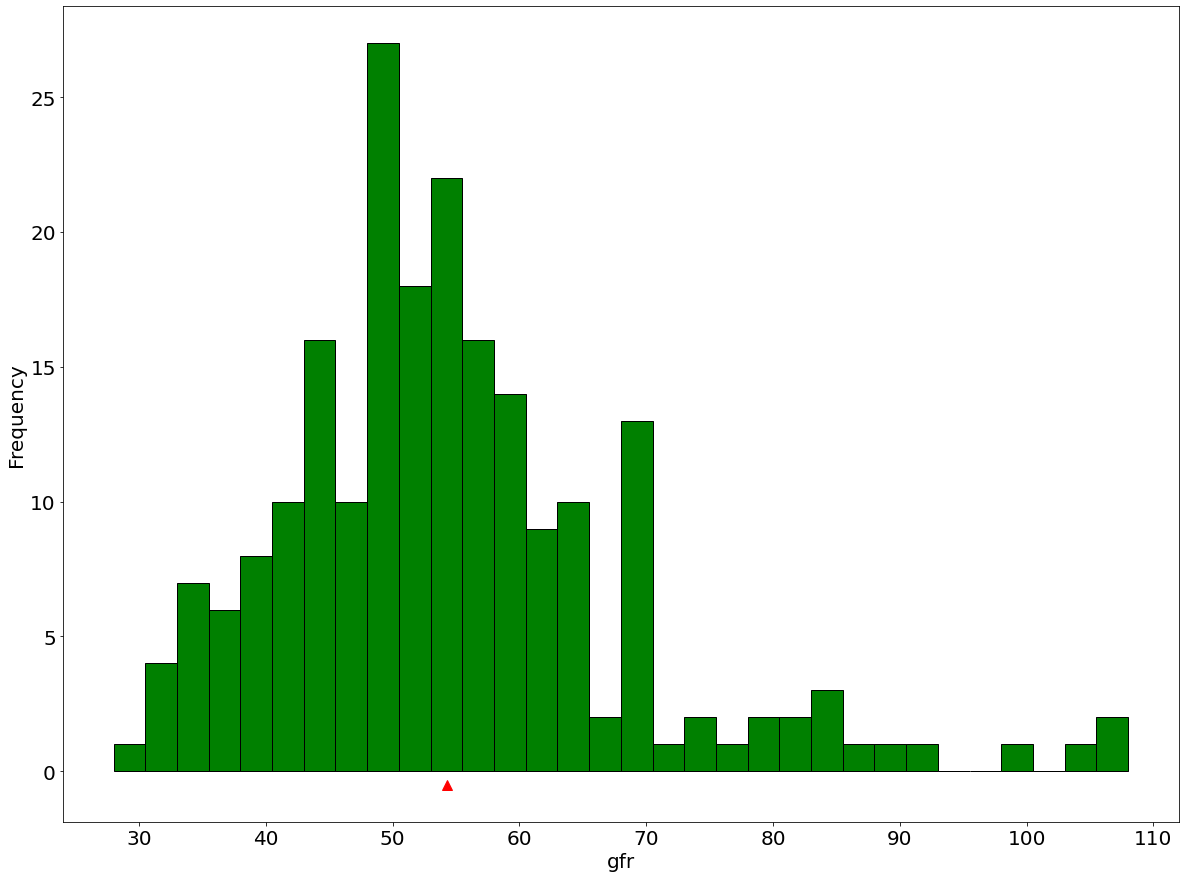

In [6]:
plt.hist(vec, bins=32, color='green', edgecolor='black')
plt.plot([mean_], [-0.5], marker='^', markersize=10, color='red')
plt.xlabel('gfr')
plt.ylabel('Frequency')
plt.show()

### 2.1: Frequentism in Practice

In [7]:
def winsorized25(values):
    q1, q3 = np.percentile(values, [25, 75])
    return np.mean(np.clip(values, q1, q3))

In [8]:
B = 1000

w25boot = np.zeros(B)
medboot = np.zeros(B)

for b in range(B):
    vecnew = np.random.choice(vec, size=n, replace=True)
    w25boot[b] = winsorized25(vecnew)
    medboot[b] = np.median(vecnew)

In [9]:
w25mean_ = round(winsorized25(vec), 2)
w25stderror_ = round(np.std(w25boot), 2)

median_ = round(np.median(vec), 2)
medstderror_ = round(np.std(medboot), 2)

In [10]:
tmplt = "{:>5.2f}     {:>5.2f}"
print("-" * 50)
print("                        Estimate   Standard Error")
print("-" * 50)
print(" mean                   " + tmplt.format(*[mean_, stderror_]))
print(" 25% Winsorized mean    " + tmplt.format(*[w25mean_, w25stderror_]))
print(" median                 " + tmplt.format(*[median_, medstderror_]))
print("-" * 50)

--------------------------------------------------
                        Estimate   Standard Error
--------------------------------------------------
 mean                   54.27      0.94
 25% Winsorized mean    52.81      0.93
 median                 52.00      0.89
--------------------------------------------------


### 2.2: Frequentist Optimality

In [11]:
n = 10
ci = np.round(np.linspace(-0.4, 0.8, 7), 2)
c = np.round(np.arange(-1, 1, 0.05), 2)

In [12]:
f0 = norm(loc=0, scale=1/np.sqrt(n))
f1 = norm(loc=0.5, scale=1/np.sqrt(n))

In [13]:
alpha_ci = [1 - f0.cdf(i) for i in ci]
beta_ci = [f1.cdf(i) for i in ci]

In [14]:
alpha_c = [1 - f0.cdf(i) for i in c]
beta_c = [f1.cdf(i) for i in c]

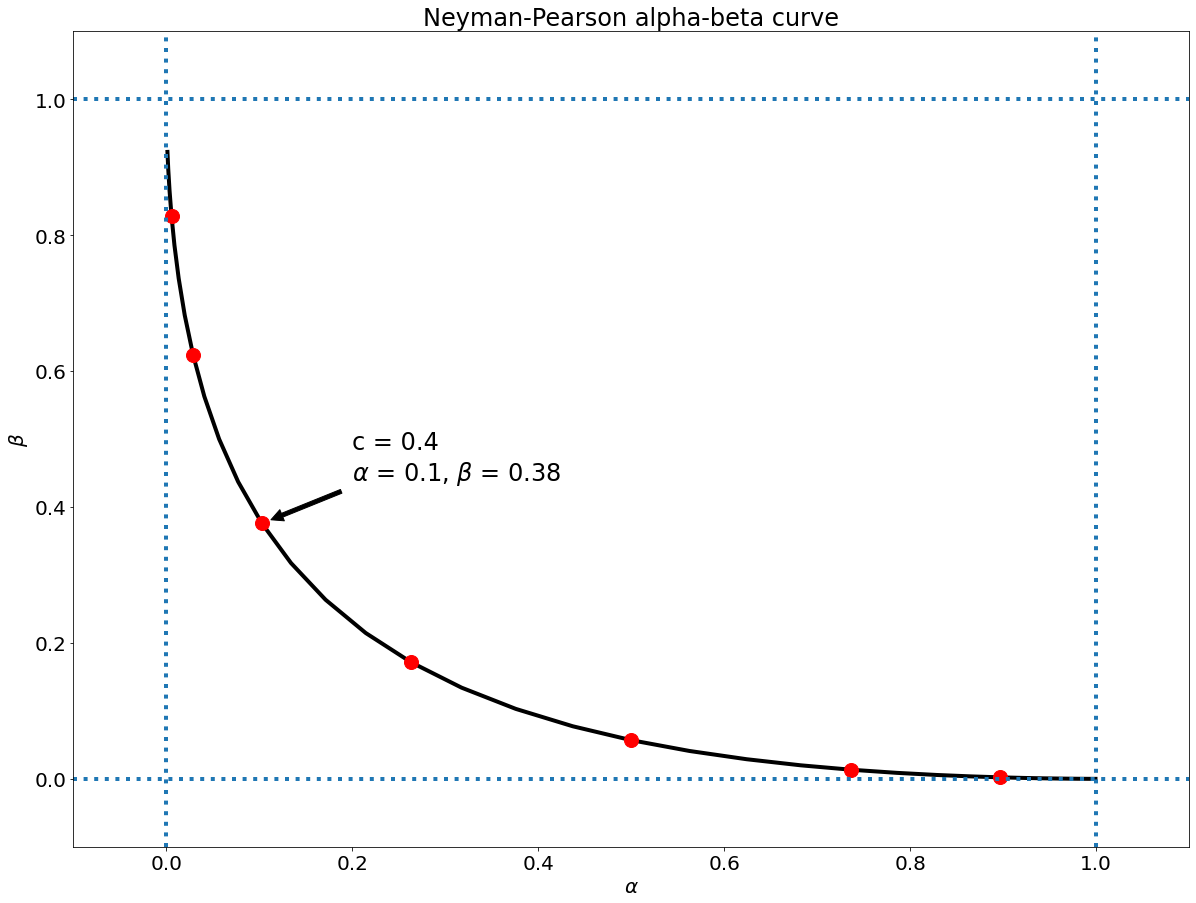

In [15]:
plt.plot(alpha_c, beta_c, '-', c='black', lw=4)
plt.plot(alpha_ci, beta_ci, 'o', c='red', ms=14)

plt.xlim(-0.10, 1.10)
plt.ylim(-0.10, 1.10)

plt.axvline(0, linestyle=":", lw = 4)
plt.axvline(1, linestyle=":", lw = 4)
plt.axhline(0, linestyle=":", lw = 4)
plt.axhline(1, linestyle=":", lw = 4)

plt.title("Neyman-Pearson alpha-beta curve")
plt.xlabel("$\\alpha$")
plt.ylabel("$\\beta$")

message = (
    "c = {0}\n$\\alpha$ = {1}, $\\beta$ = {2}"
    .format(
        round(ci[-3], 2) , 
        round(alpha_ci[-3], 2), 
        round(beta_ci[-3], 2)
    )
)
plt.annotate(
    message, (alpha_ci[-3], beta_ci[-3]), size=24,
    xytext=(0.25, 0.45), textcoords='axes fraction', 
    arrowprops=dict(color='black', shrink=0.1)
)

plt.show()